#### 랜덤포레스트(Random Forest)는 모형 결합(앙상블 방법론)의 하나  
- 모형 결합(model combining)의 또 다른 이름은 **'앙상블 방법론(ensembel methods)'**
- 특정한 하나의 예측 방법이 아닌 복수의 예측 모형을 결합하여 더 나은 성능을 예측하려는 시도. -> **다수의 weak classifier로 strong classifier를 만든다.** 
- 앙상블 방법론의 장점  
    1. 단일 모형(의사결정나무, logistic regression 등)을 사용할 때보다 과 최적화가 방지
    2. 개별 모형이 성능이 안 좋을 경우에는 결합 모형의 성능이 더 향상된다.
    
모형 결합 방법은 크게 2가지, 취합(aggregation)방법론과 부스팅(boosting)방법론으로 나눌 수 있다.  
- 취합 방법론 : 사용할 모형이 이미 결정되어짐(ex. 랜덤포레스트)
- 부스팅 방버론 : 사용할 모형을 점진적으로 늘려가는 형태(ex. xgboost)

#### 랜덤 포레스트(Random Forest)란?
- 의사결정나무(Decision Tree)를 개별 모형으로 사용하는 모형 결합 방법.
- 장점 : 각 독립 변수의 중요도(feature importance)를 계산할 수 있다는 점. 및 과최적화 방지
- 단점 : 분류 시에는 성능이 좋으나 회귀에는 분류만큼 성능이 좋지 않음.

### 어떻게 사용되고 있나?
- 은행 : 충성 고객 혹은 사기꾼 탐색(Fraud Detection)
- 의료계 : 병 혹은 병에 필요한 약에 대한 분류
- e-commerce : 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor

%matplotlib inline

#### 데이터 로드

In [2]:
train = pd.read_csv("train.csv")

In [3]:
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [4]:
# 불필요한 데이터 및 test data에 없는 데이터 삭제
train.drop(columns = ["id", "vendor_id", "store_and_fwd_flag", "dropoff_datetime"], axis = 0, inplace = True, errors = 'ignore')
# test.drop(columns = ["id", "vendor_id", "store_and_fwd_flag", "dropoff_datetime", "index"], axis = 0, inplace = True, errors = 'ignore')


In [5]:
#데이터 
train["log1p_y"] = np.log1p(train["trip_duration"])

C:\Users\dskang\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\dskang\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


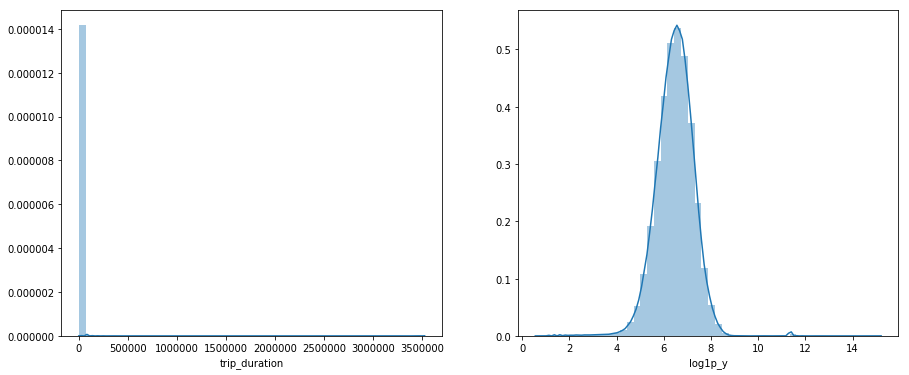

In [6]:
#편향(skewed)된 데이터의 log화
plt.figure(figsize = (15, 6))

ax1 = plt.subplot(1, 2, 1)
sns.distplot(train["trip_duration"], ax = ax1)

ax2 = plt.subplot(1, 2, 2)
sns.distplot(train["log1p_y"], ax = ax2)

In [8]:
train["hour"] = pd.to_datetime(train["pickup_datetime"]).dt.hour
# test["hour"] = pd.to_datetime(test["pickup_datetime"]).dt.hour

In [9]:
train_y = train["log1p_y"]
train.drop(columns = ["trip_duration", "pickup_datetime", "log1p_y"], inplace = True, errors = "ignore")
# test.drop(columns = ["pickup_datetime"], inplace = True, errors = "ignore")

In [10]:
train_x = train
# test_original = test.copy
# test_y = np.log1p(test["trip_duration"])
# test_x = test.drop(columns = "trip_duration", axis = 0,inplace = True)

#### 정규화

In [11]:
from sklearn.preprocessing import StandardScaler 

In [12]:
scaler = StandardScaler()
scaler.fit(train_x)
train_x_norm = scaler.transform(train_x)

In [ ]:
# scaler = StandardScaler()
# scaler.fit(test_x)
# test_x_norm = scaler.transform(test_x)

#### model 생성

In [21]:
regr = RandomForestRegressor(max_depth = 2)

In [22]:
regr.fit(train_x, train_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [23]:
regr.feature_importances_

array([0.        , 0.51176949, 0.        , 0.48823051, 0.        ,
       0.        ])

In [24]:
#train데이터로 예측 데이터 생성
predict_y = regr.predict(train_x)

#### 채점(train-train)

In [25]:
from sklearn.metrics import mean_squared_error

In [26]:
mse = mean_squared_error(train_y, predict_y)

In [27]:
forest_rmse = np.sqrt(mse)

In [28]:
forest_rmse

0.7342267730750313

#### 모델 튜닝

In [29]:
from sklearn.model_selection import GridSearchCV

In [37]:
param_grid = {
    "n_estimators" : [i for i in range(20, 200, 10)],
    "max_features" : [2, 4, 6, 8],
    "max_depth" : [2, 4, 6, 8],
    
}

In [38]:
forest_rsg = RandomForestRegressor()

In [39]:
grid_search = GridSearchCV(forest_rsg, param_grid, cv = 5, scoring = "neg_mean_squared_error")

In [ ]:
grid_search.fit(train_x, train_y)

#### 교차 검증

In [19]:
from sklearn.model_selection import cross_val_score

In [17]:
train_x_norm

1458644